In [159]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from matplotlib.colors import ListedColormap

In [128]:
# Читаем данные в датафрейм
df = pd.read_csv('Run200_Wave_0_1.txt', sep=' ', header=None, skipinitialspace=True)


In [129]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,500,501,502,503,504
0,2890276,357,113,500,14820,14823,14824,14822,14818,14820,...,14822,14815,14815,14817,14819,14820,14822,14820,14819,NaN
1,4928764,740,359,500,14820,14822,14820,14826,14824,14822,...,14817,14824,14822,14824,14819,14820,14819,14822,14820,NaN
2,9630204,162,499,500,14820,14820,14822,14825,14820,14824,...,14821,14820,14820,14818,14821,14823,14820,14820,14821,NaN
3,15798632,841,123,500,14828,14822,14818,14824,14824,14822,...,14826,14822,14821,14820,14828,14820,14822,14823,14822,NaN
4,20637296,412,348,500,14823,14815,14823,14821,14827,14820,...,14820,14823,14828,14824,14820,14824,14824,14822,14825,NaN


In [130]:
# Убираем столбцы с метаинформацией
df = df.drop([0, 1, 2, 3, 504], axis=1)
# Нумеруем столбцы
df.columns = list(range(500))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,14820,14823,14824,14822,14818,14820,14824,14822,14820,14820,...,14828,14822,14815,14815,14817,14819,14820,14822,14820,14819
1,14820,14822,14820,14826,14824,14822,14820,14822,14823,14821,...,14828,14817,14824,14822,14824,14819,14820,14819,14822,14820
2,14820,14820,14822,14825,14820,14824,14824,14819,14823,14824,...,14820,14821,14820,14820,14818,14821,14823,14820,14820,14821
3,14828,14822,14818,14824,14824,14822,14820,14822,14824,14820,...,14824,14826,14822,14821,14820,14828,14820,14822,14823,14822
4,14823,14815,14823,14821,14827,14820,14823,14824,14816,14821,...,14820,14820,14823,14828,14824,14820,14824,14824,14822,14825


In [131]:
df.shape

(23479, 500)

Оцеим первые 1000 семплов

Text(0, 0.5, 'bit ADC')

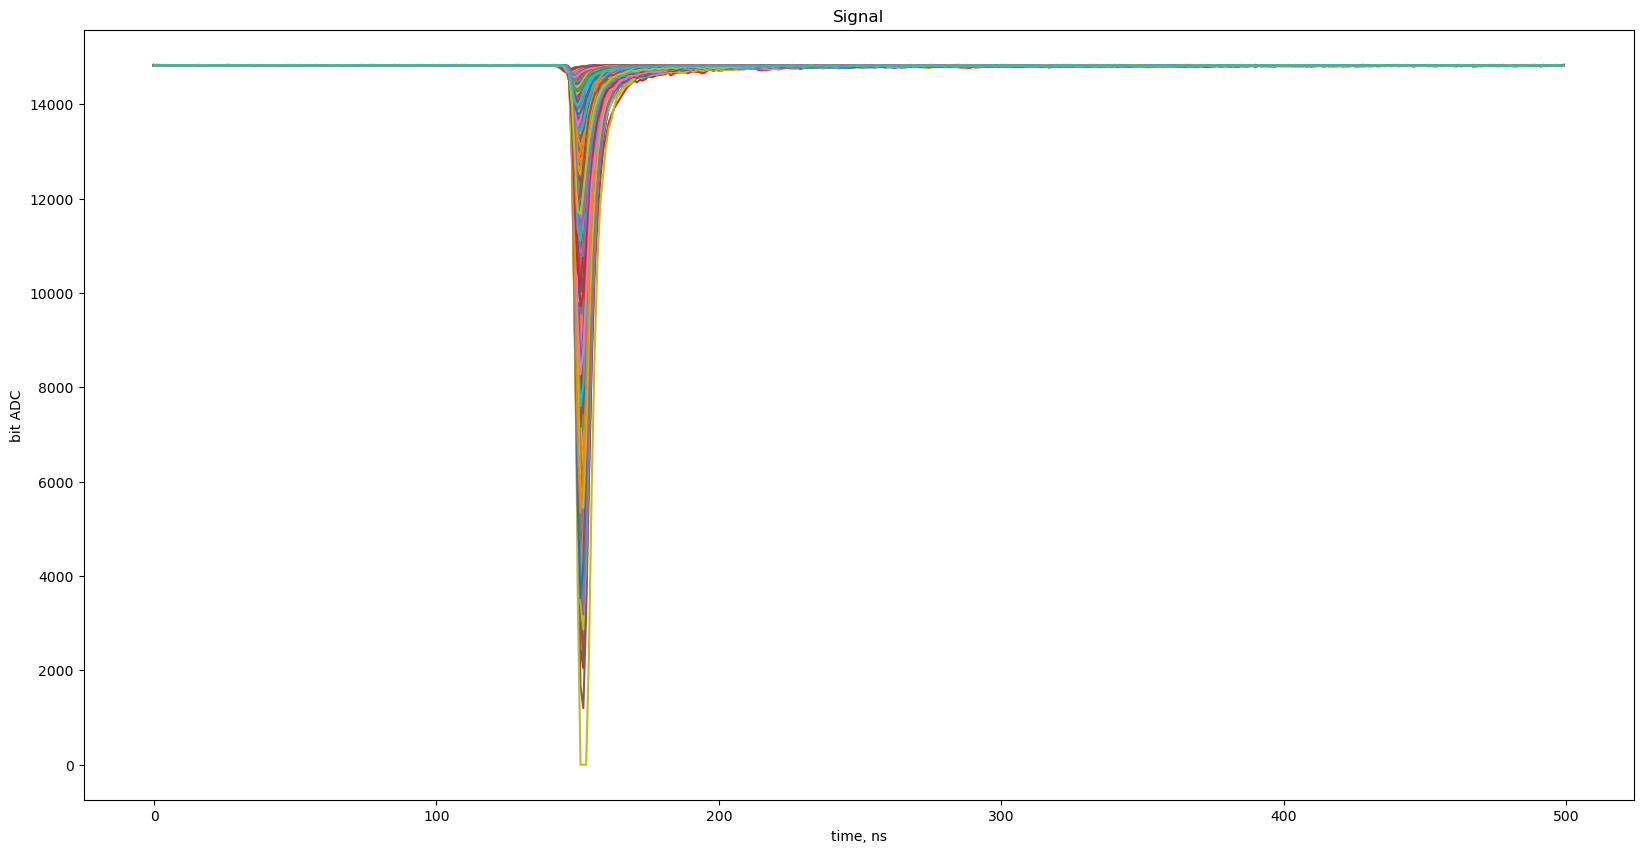

In [132]:
N=range(0,1000)
ax = df.T[N].plot(title='Signal' ,legend=None,figsize=(20,10))
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")

Этот код строит график сигнала в диапазоне 140–200 нс для первых 100 событий, предварительно преобразовав данные так, чтобы:

сигнал отображался корректно (не инвертированным),

был смещён для удобного просмотра,

выделялась только интересующая часть сигнала (пик).

Text(0, 0.5, 'bit ADC')

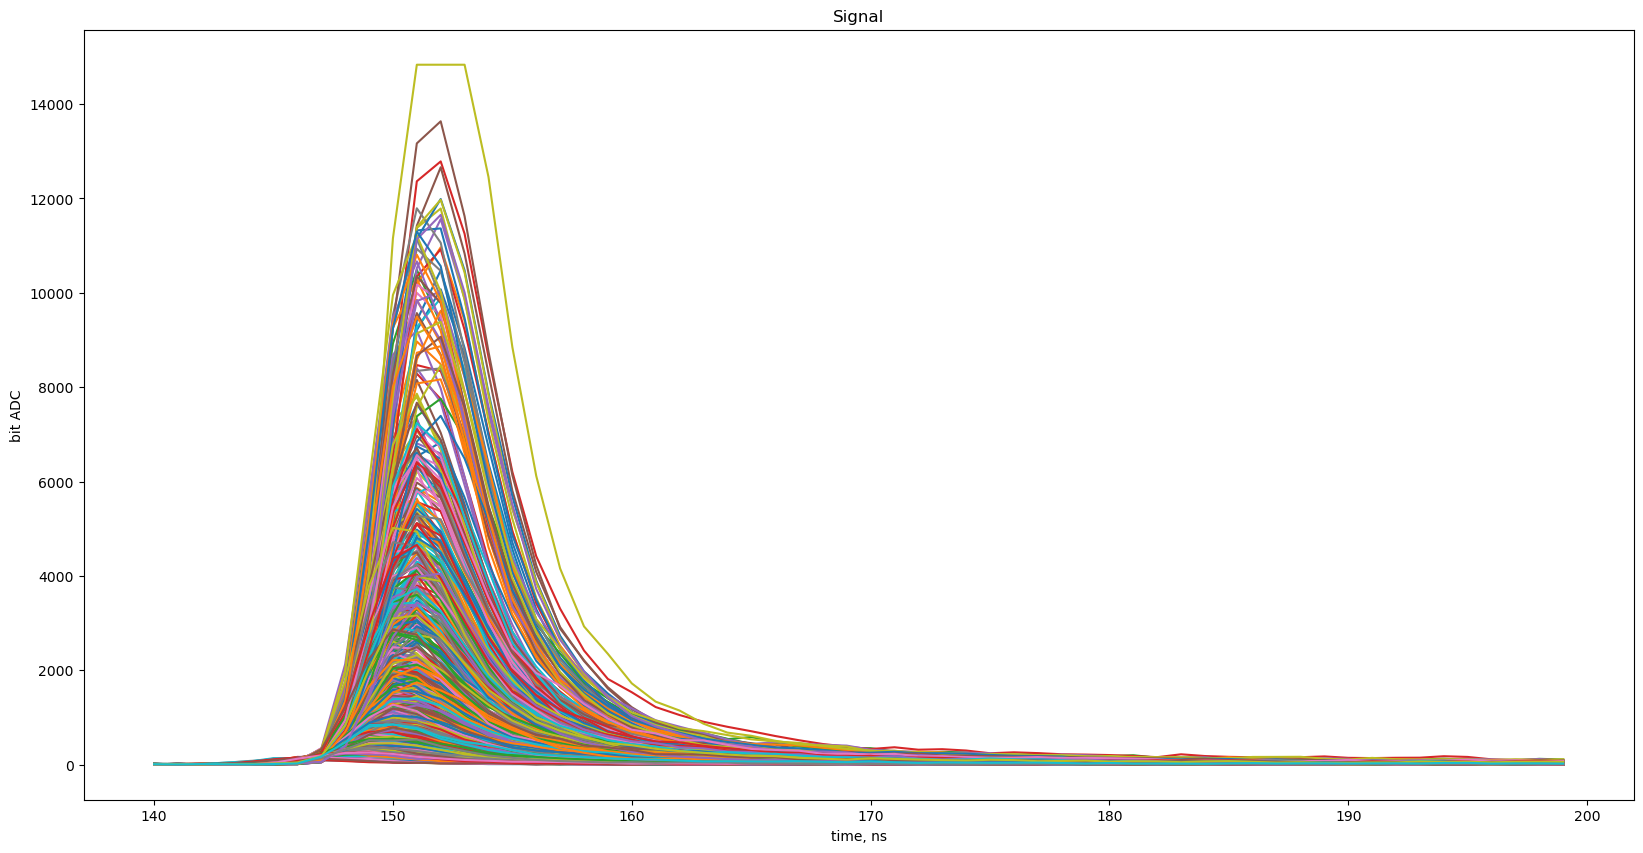

In [133]:
ax = (2**14-df.T[N]-1550)[140:200].plot(title='Signal' ,legend=None,figsize=(20,10))
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")

Это стандартный способ предобработки данных с АЦП, чтобы:
убрать лишний фон,
подготовить данные для дальнейшего анализа 

In [134]:
df = 2**14-df-1550
df.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,14,11,10,12,16,14,10,12,14,14,...,6,12,19,19,17,15,14,12,14,15
1,14,12,14,8,10,12,14,12,11,13,...,6,17,10,12,10,15,14,15,12,14
2,14,14,12,9,14,10,10,15,11,10,...,14,13,14,14,16,13,11,14,14,13
3,6,12,16,10,10,12,14,12,10,14,...,10,8,12,13,14,6,14,12,11,12
4,11,19,11,13,7,14,11,10,18,13,...,14,14,11,6,10,14,10,10,12,9


Создадим столбец с максимальными значениями

In [135]:
dff = df.copy()
dff['max'] = dff.max(axis=1)
dff['max'].describe()

count    23479.000000
mean      1846.138209
std       2389.308983
min        115.000000
25%        319.000000
50%        824.000000
75%       2326.000000
max      14834.000000
Name: max, dtype: float64

мосмотрим максимальные значения

In [136]:
max_df = dff[dff['max']==14834]
max_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,max
798,14,14,10,14,17,6,11,11,16,6,...,12,12,14,18,10,14,12,16,12,14834
6401,11,8,10,9,7,11,10,7,7,10,...,14,18,15,14,11,7,11,14,14,14834
9190,12,14,7,15,14,12,14,11,14,11,...,17,14,9,14,15,10,12,12,14,14834
9553,7,14,16,14,11,10,12,11,10,10,...,6,10,15,14,17,14,14,14,11,14834
11289,10,8,11,6,13,19,4,11,12,10,...,14,12,16,12,10,17,17,14,10,14834
13595,9,6,14,7,7,10,12,7,9,10,...,10,13,14,15,11,15,7,14,17,14834
17790,10,10,16,7,7,7,7,9,14,11,...,13,7,8,10,9,14,13,10,10,14834
22310,10,10,7,10,14,11,7,11,10,6,...,17,16,12,11,9,15,4,14,12,14834
23118,7,12,10,12,10,12,14,13,15,11,...,10,10,12,11,12,10,21,18,25,14834


Получаем список индексов строк с максимальными значениями (over_max_index)
Транспонирует DataFrame (max_df.T) и выбирает строки с индексами 140-190
Строит график сигналов без легенды с размерами 20x10
Добавляет подписи осей:
Ось X: "time, ns"
Ось Y: "bit ADC"

Text(0, 0.5, 'bit ADC')

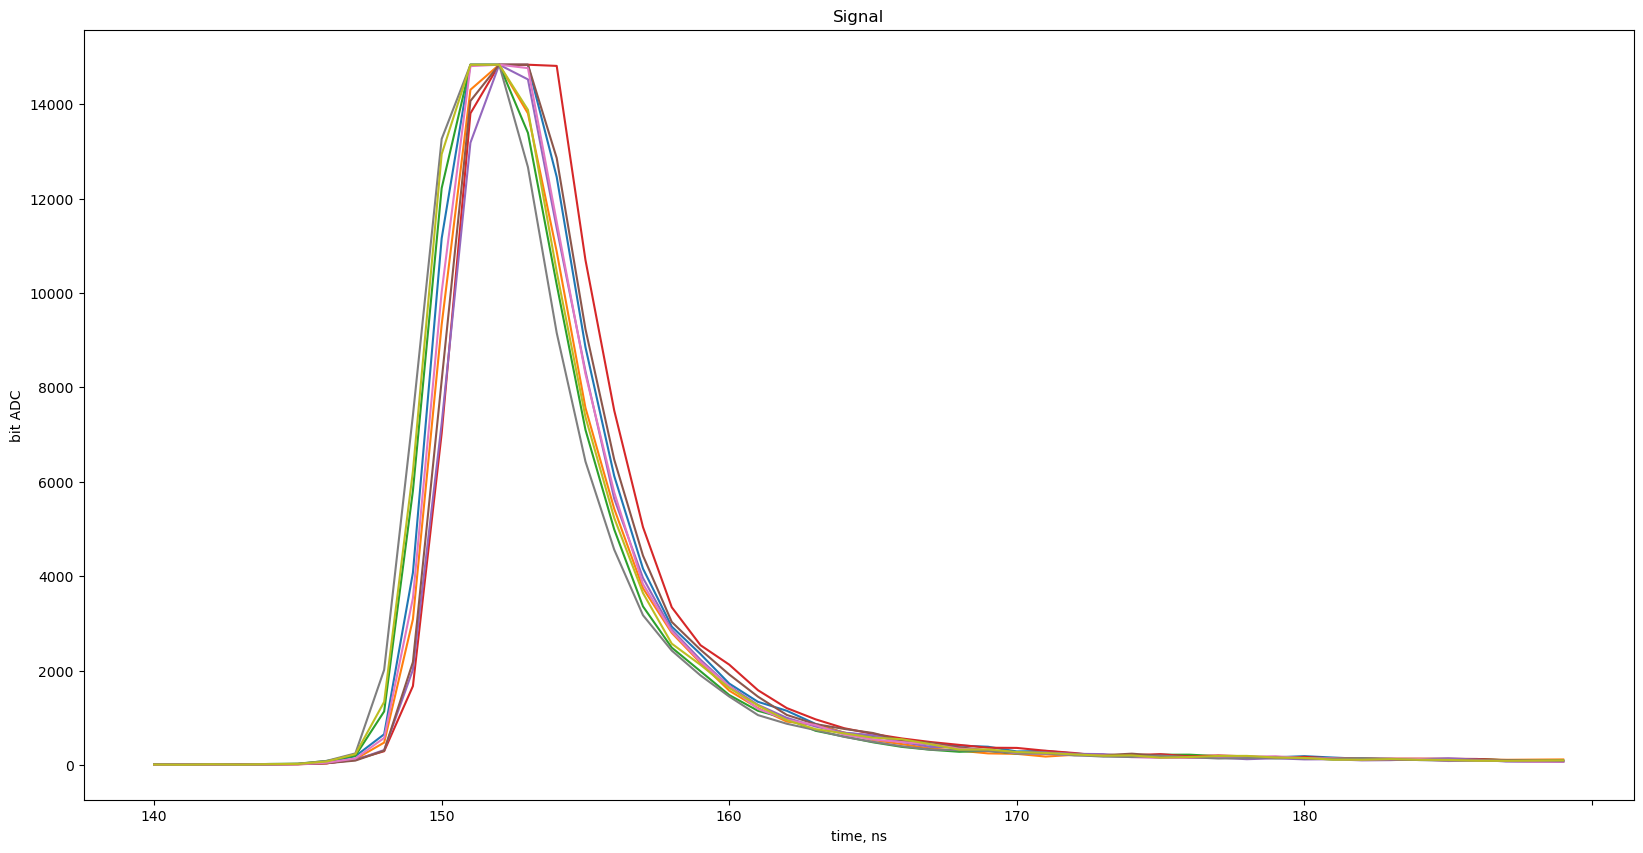

In [137]:
over_max_index = max_df.index.tolist()
ax = max_df.T[over_max_index][140:190].plot(title='Signal' ,legend=None,figsize=(20,10))
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")

In [138]:

dff.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,max
0,14,11,10,12,16,14,10,12,14,14,...,12,19,19,17,15,14,12,14,15,543
1,14,12,14,8,10,12,14,12,11,13,...,17,10,12,10,15,14,15,12,14,1913
2,14,14,12,9,14,10,10,15,11,10,...,13,14,14,16,13,11,14,14,13,2570
3,6,12,16,10,10,12,14,12,10,14,...,8,12,13,14,6,14,12,11,12,576
4,11,19,11,13,7,14,11,10,18,13,...,14,11,6,10,14,10,10,12,9,1806


In [139]:
# Функция для подсчёта пиков в одной строке
def count_peaks(row, height=100, distance=100):
    peaks, _ = find_peaks(row, height=height, distance=distance)
    return len(peaks)

# Применяем функцию к каждой строке
peaks_per_row = df.apply(count_peaks, axis=1)

# Строки, где пиков > 1
multi_peak_rows = peaks_per_row[peaks_per_row > 1]
multi_peak_index = multi_peak_rows.index.tolist()
print("Строк с более чем одним пиком:", len(multi_peak_index))

Строк с более чем одним пиком: 2


Определяет функцию count_peaks(), которая:
Использует find_peaks из scipy.signal
Ищет пики выше указанной высоты (height=100) (Это лучшие варианты,проверено из выборки)
Учитывает минимальное расстояние между пиками (distance=100) (Это лучшие варианты,проверено из выборки)
Возвращает количество найденных пиков
Применяет эту функцию ко всем строкам DataFrame (df.apply())
Фильтрует строки, где количество пиков больше 1
Сохраняет индексы таких строк в список multi_peak_index
Выводит количество строк с несколькими пиками

Text(0, 0.5, 'bit ADC')

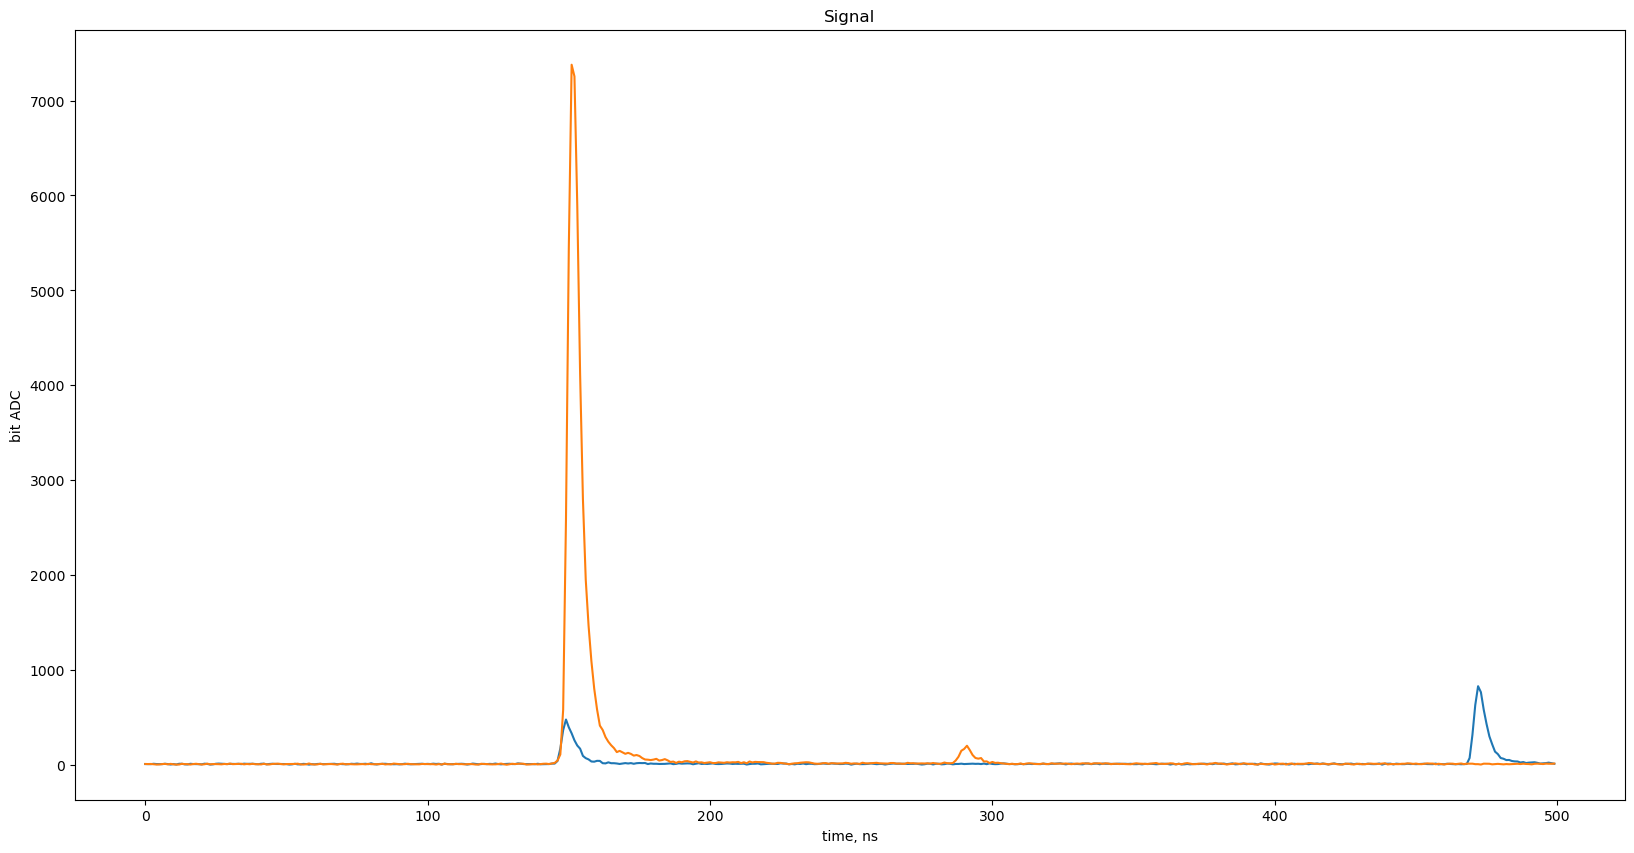

In [140]:
ax = df.T[multi_peak_index].plot(title='Signal' ,legend=None,figsize=(20,10))
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")


In [141]:
dff['amplitude'] = dff['max'] - dff.iloc[:, :-1].min(axis=1)
dff['amplitude'].describe()

count    23479.000000
mean      1842.849568
std       2389.075855
min        113.000000
25%        316.000000
50%        820.000000
75%       2322.500000
max      14833.000000
Name: amplitude, dtype: float64

Создаем новый столбец 'amplitude' в DataFrame dff, который рассчитывается как:

Максимальное значение в строке (из столбца 'max')

Минус минимальное значение в строке (игнорируя последний столбец с помощью iloc[:, :-1])

In [145]:

dff.head()

,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,max,amplitude
0,14,11,10,12,16,14,10,12,14,14,...,19,19,17,15,14,12,14,15,543,539
1,14,12,14,8,10,12,14,12,11,13,...,10,12,10,15,14,15,12,14,1913,1907
2,14,14,12,9,14,10,10,15,11,10,...,14,14,16,13,11,14,14,13,2570,2566
3,6,12,16,10,10,12,14,12,10,14,...,12,13,14,6,14,12,11,12,576,573
4,11,19,11,13,7,14,11,10,18,13,...,11,6,10,14,10,10,12,9,1806,1800


Добавляем новый столбец 'square', содержащий сумму всех значений в строке, кроме значений в двух последних столбцах исходного DataFrame.

In [147]:
dff['square'] = dff.iloc[:, :-2].sum(axis=1)
dff.head()

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,max,amplitude,square
0,14,11,10,12,16,14,10,12,14,14,...,19,17,15,14,12,14,15,543,539,11592
1,14,12,14,8,10,12,14,12,11,13,...,12,10,15,14,15,12,14,1913,1907,20026
2,14,14,12,9,14,10,10,15,11,10,...,14,16,13,11,14,14,13,2570,2566,25565
3,6,12,16,10,10,12,14,12,10,14,...,13,14,6,14,12,11,12,576,573,10854
4,11,19,11,13,7,14,11,10,18,13,...,6,10,14,10,10,12,9,1806,1800,19697


Визуализируем данные по амплитуде и площади под кривой

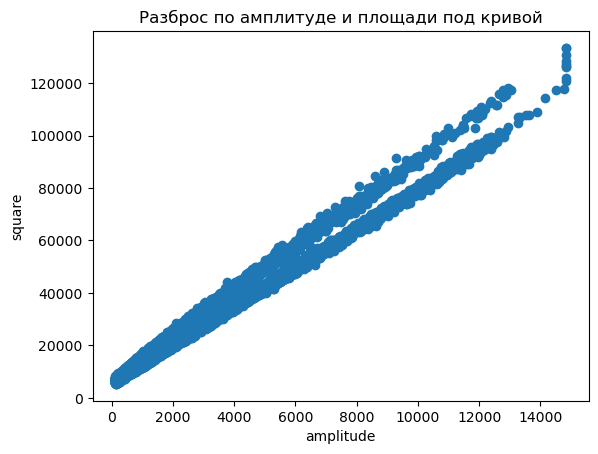

In [154]:
plt.scatter(dff['amplitude'], dff['square'])
plt.xlabel('amplitude')
plt.ylabel('square')
plt.title('Разброс по амплитуде и площади под кривой')
plt.show()

Подготовим датафрейм для 2 классов

In [148]:
X = dff[['amplitude', 'square']]
X.head()


,amplitude,square
0,539,11592
1,1907,20026
2,2566,25565
3,573,10854
4,1800,19697


Проведем стандартизацию данных

In [149]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [150]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Объясненная дисперсия:", pca.explained_variance_ratio_)

Объясненная дисперсия: [0.996229 0.003771]


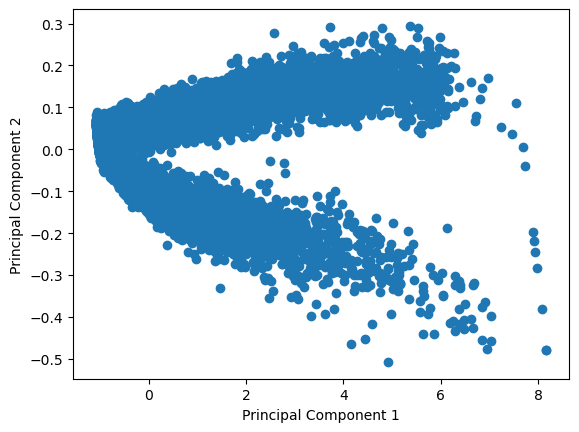

In [152]:
#Визуализируем значение компонент
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Применяем KMeans для разбиения на кластеры

In [153]:
kmeans = KMeans(n_clusters=2, n_init=100, random_state=42)
clusters = kmeans.fit_predict(X_pca)

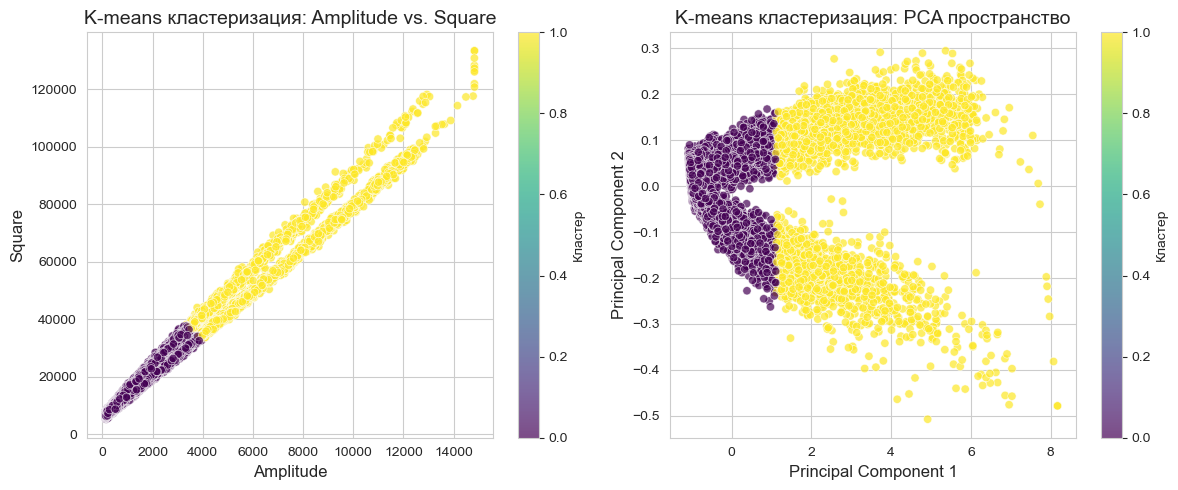

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля графиков
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

# 1. График amplitude vs. square
plt.subplot(1, 2, 1)
scatter = plt.scatter(
    dff['amplitude'], 
    dff['square'], 
    c=clusters, 
    cmap='viridis',  # или 'tab10', если кластеров <=10
    alpha=0.7,
    edgecolors='w',
    linewidth=0.5
)
plt.xlabel('Amplitude', fontsize=12)
plt.ylabel('Square', fontsize=12)
plt.title('K-means кластеризация: Amplitude vs. Square', fontsize=14)

# Добавляем цветовую легенду, если кластеров не слишком много
if len(set(clusters)) <= 10:
    plt.colorbar(scatter, label='Кластер')

# 2. График PCA компонент
plt.subplot(1, 2, 2)
scatter_pca = plt.scatter(
    X_pca[:, 0], 
    X_pca[:, 1], 
    c=clusters, 
    cmap='viridis', 
    alpha=0.7,
    edgecolors='w',
    linewidth=0.5
)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('K-means кластеризация: PCA пространство', fontsize=14)

if len(set(clusters)) <= 10:
    plt.colorbar(scatter_pca, label='Кластер')

plt.tight_layout()  # Чтобы избежать наложения подписей
plt.show()

разделено неправильно, пробуем другие способы

In [157]:
agg = AgglomerativeClustering(n_clusters=2).fit(X_pca)
clusters = agg.labels_

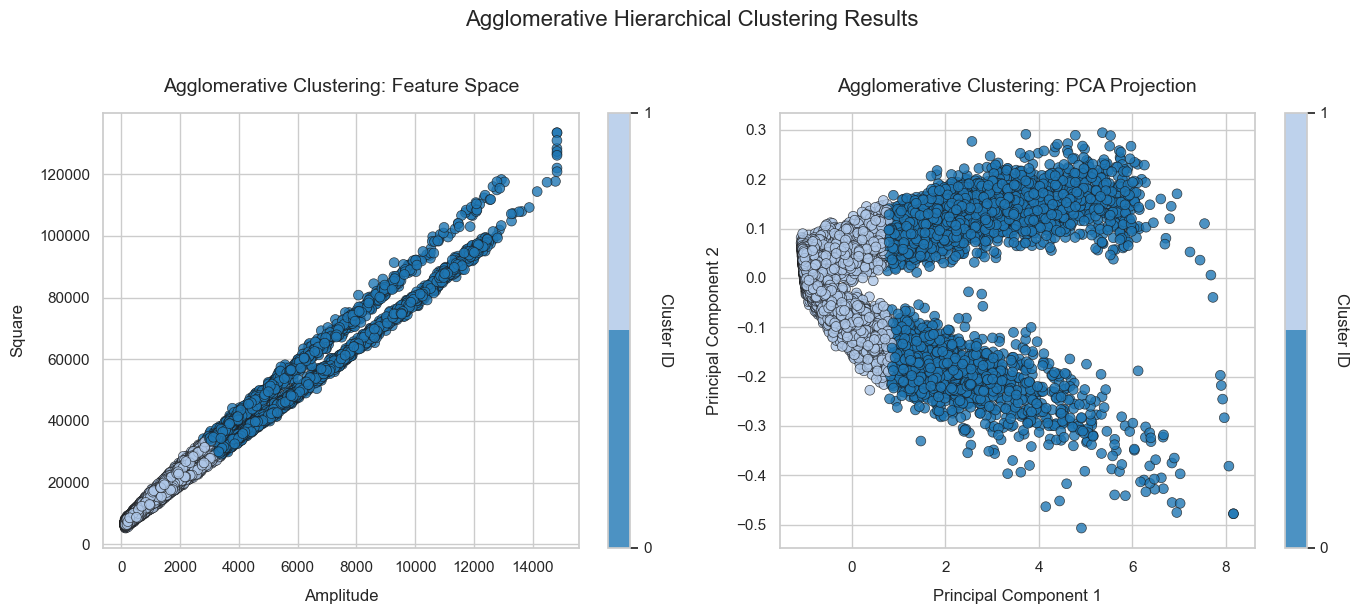

In [160]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(14, 6))

# 1. Создаем кастомную цветовую карту для кластеров
n_clusters = len(set(clusters))
colors = plt.cm.tab20.colors[:n_clusters] if n_clusters <= 20 else plt.cm.tab20b.colors
cmap = ListedColormap(colors)

# 2. Первый график: amplitude vs square
plt.subplot(1, 2, 1)
sc = plt.scatter(dataset['amplitude'], dataset['square'], 
                c=clusters, cmap=cmap, s=50, alpha=0.8,
                edgecolor='k', linewidth=0.5)
plt.xlabel('Amplitude', fontsize=12, labelpad=10)
plt.ylabel('Square', fontsize=12, labelpad=10)
plt.title('Agglomerative Clustering: Feature Space', 
         fontsize=14, pad=15)

# Добавляем цветовую легенду
cbar = plt.colorbar(sc, ticks=range(n_clusters))
cbar.set_label('Cluster ID', rotation=270, labelpad=15)

# 3. Второй график: PCA проекция
plt.subplot(1, 2, 2)
sc_pca = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                    c=clusters, cmap=cmap, s=50, alpha=0.8,
                    edgecolor='k', linewidth=0.5)
plt.xlabel('Principal Component 1', fontsize=12, labelpad=10)
plt.ylabel('Principal Component 2', fontsize=12, labelpad=10)
plt.title('Agglomerative Clustering: PCA Projection', 
         fontsize=14, pad=15)

# Добавляем цветовую легенду
cbar_pca = plt.colorbar(sc_pca, ticks=range(n_clusters))
cbar_pca.set_label('Cluster ID', rotation=270, labelpad=15)

# Общие настройки
plt.suptitle('Agglomerative Hierarchical Clustering Results', 
            fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Плохой результат плохой,пробуем  DBSCAN

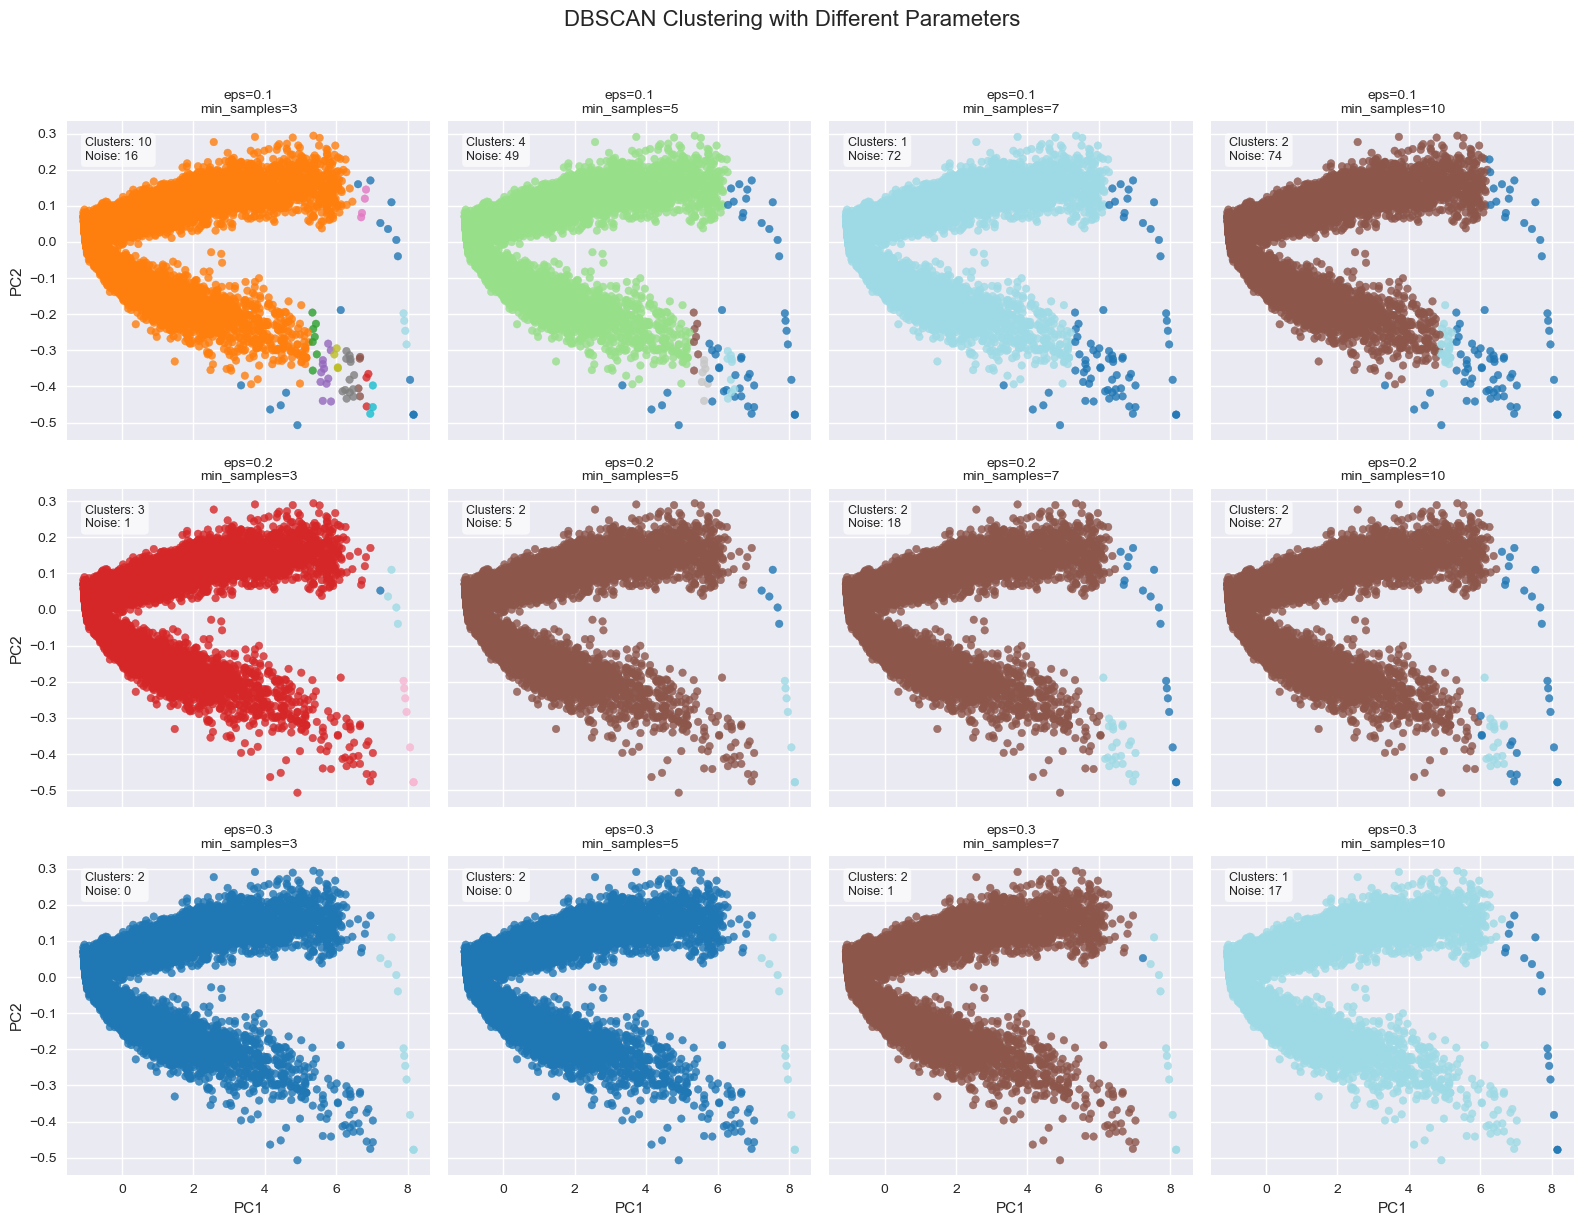

In [161]:
# Настройка стиля графиков
plt.style.use('seaborn-v0_8')

# Создаем сетку параметров
eps_values = [0.1, 0.2, 0.3]
min_samples_values = [3, 5, 7, 10]

# Создаем фигуру с несколькими подграфиками
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), 
                        figsize=(16, 12),
                        sharex=True, sharey=True)

# Делаем заголовок для всей фигуры
fig.suptitle('DBSCAN Clustering with Different Parameters', 
            fontsize=16, y=1.02)

# Перебираем все комбинации параметров
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Выполняем кластеризацию
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_pca)
        clusters = dbscan.labels_
        
        # Визуализация на соответствующем подграфике
        ax = axes[i,j]
        scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], 
                            c=clusters, 
                            cmap='tab20',  # Хорошая палитра для кластеров
                            s=30, 
                            alpha=0.8)
        
        # Подписи только по краям
        if i == len(eps_values)-1:
            ax.set_xlabel('PC1')
        if j == 0:
            ax.set_ylabel('PC2')
        
        # Заголовок подграфика с параметрами
        ax.set_title(f'eps={eps}\nmin_samples={min_samples}', fontsize=10)
        
        # Добавляем информацию о количестве кластеров (исключая шум)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise = list(clusters).count(-1)
        ax.text(0.05, 0.95, 
               f'Clusters: {n_clusters}\nNoise: {n_noise}',
               transform=ax.transAxes,
               fontsize=9,
               verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Настраиваем отступы между графиками
plt.tight_layout()
plt.show()

Ни один вариант не дал правилььного решения 

Попробуем GaussianMixture

In [162]:
gmm = GaussianMixture(n_components=2, init_params='k-means++', n_init=200).fit(X_pca)
clusters = gmm.predict(X_pca)

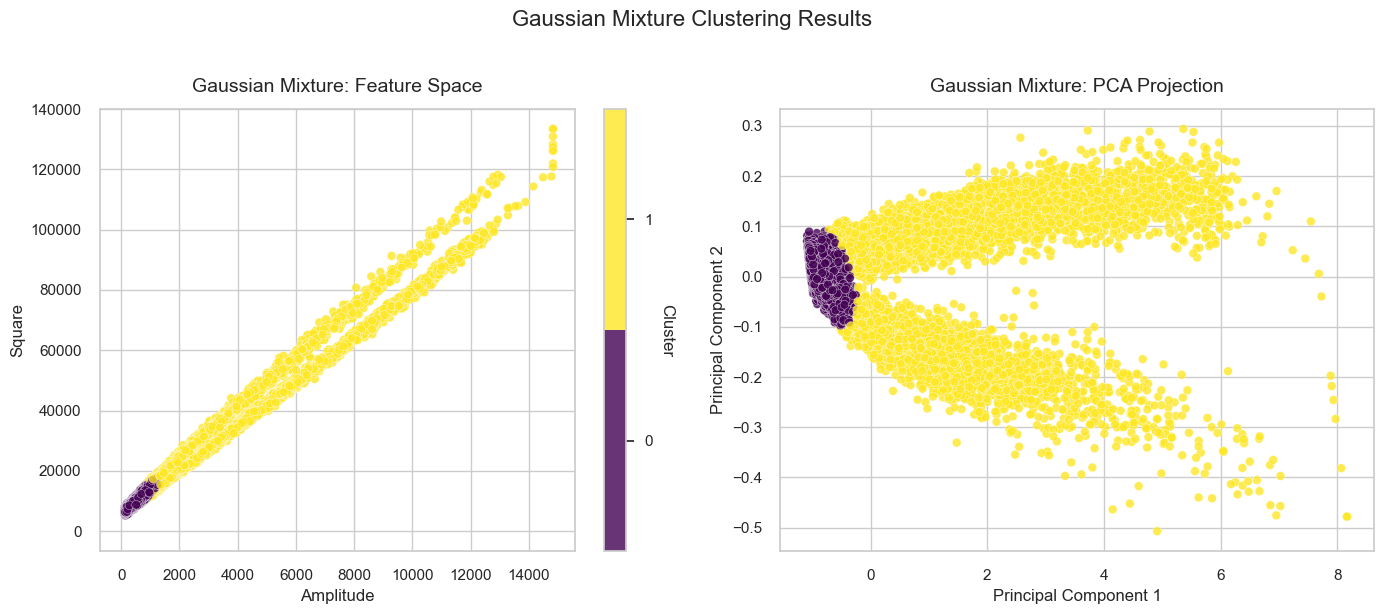

In [163]:
# Настройка стиля
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(14, 6))

# 1. Первый график: исходные признаки
plt.subplot(1, 2, 1)
scatter = plt.scatter(dff['amplitude'], dff['square'], 
                     c=clusters, cmap='viridis', 
                     s=40, alpha=0.8, edgecolor='w', linewidth=0.3)
plt.xlabel('Amplitude', fontsize=12)
plt.ylabel('Square', fontsize=12)
plt.title('Gaussian Mixture: Feature Space', fontsize=14, pad=12)

# Добавляем эллипсы для визуализации гауссиан (если доступны ковариации)
if hasattr(gmm, 'covariances_'):  # gmm - ваша модель GaussianMixture
    from matplotlib.patches import Ellipse
    for n in range(len(np.unique(clusters))):
        if gmm.covariance_type in ['full', 'tied', 'diag', 'spherical']:
            cov = gmm.covariances_[n] if gmm.covariance_type != 'tied' else gmm.covariances_
            v, w = np.linalg.eigh(cov)
            angle = np.degrees(np.arctan2(w[0][1], w[0][0]))
            v = 2. * np.sqrt(2.) * np.sqrt(v)
            ell = Ellipse(gmm.means_[n], v[0], v[1], angle=angle, 
                         color=plt.cm.viridis(n / len(np.unique(clusters))),
                         alpha=0.2)
            plt.gca().add_patch(ell)

# 2. Второй график: PCA проекция
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], 
           c=clusters, cmap='viridis', 
           s=40, alpha=0.8, edgecolor='w', linewidth=0.3)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('Gaussian Mixture: PCA Projection', fontsize=14, pad=12)

# Общие настройки
plt.suptitle('Gaussian Mixture Clustering Results', fontsize=16, y=1.02)
plt.tight_layout()

# Добавляем цветовую шкалу
cbar = plt.colorbar(scatter, ticks=np.unique(clusters), 
                   boundaries=np.arange(len(np.unique(clusters))+1)-0.5)
cbar.set_label('Cluster', rotation=270, labelpad=15)

plt.show()

В ходе экспериментов я тестировал различные комбинации гиперпараметров во всех моделях, однако ни одна из них не смогла обеспечить корректное разделение данных. Как видно на графике PCA, данные достаточно четко разделяются на два кластера простой вертикальной линией при значении второй главной компоненты чуть ниже нуля. Эмпирическим путем было установлено, что оптимальное пороговое значение для разделения составляет -0,00001 по второй главной компоненте.

In [164]:
# Инициализируем массив кластеров (все точки относятся к классу 1 по умолчанию)
clusters = np.ones(len(X_pca), dtype=int)

# Разделяем данные на два кластера по значению второй компоненты PCA
threshold = -0.00001  # Пороговое значение для разделения
clusters[X_pca[:, 1] > threshold] = 0  # Присваиваем 0 точкам выше порога

# Помечаем специальные случаи:
clusters[over_max_index] = 2   # Данные за пределами чувствительности прибора
clusters[multi_peak_index] = 2 # Строки с двумя пиками

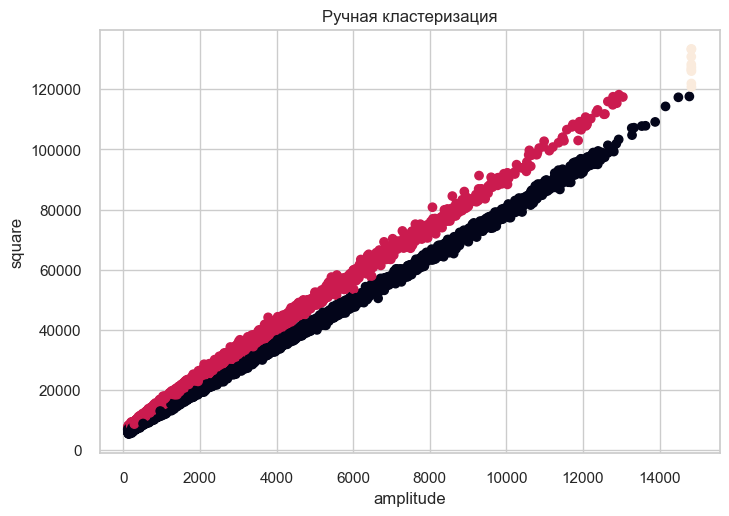

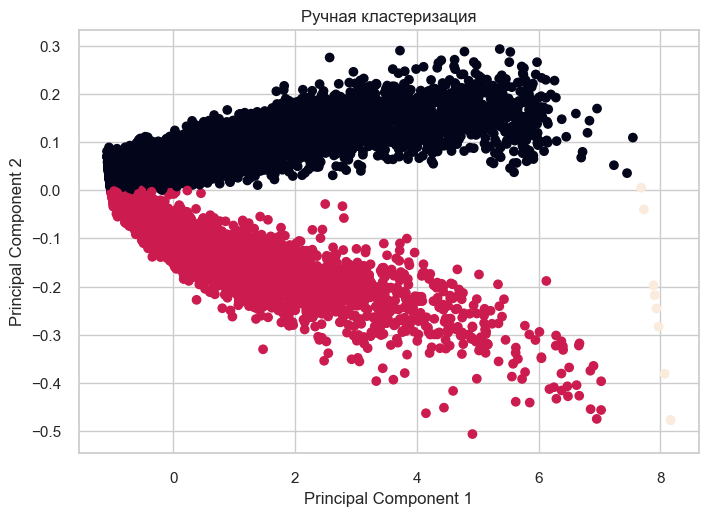

In [165]:
plt.scatter(dff['amplitude'], dff['square'], c=clusters)
plt.xlabel('amplitude')
plt.ylabel('square')
plt.title('Ручная кластеризация')
plt.show()

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Ручная кластеризация')
plt.show()


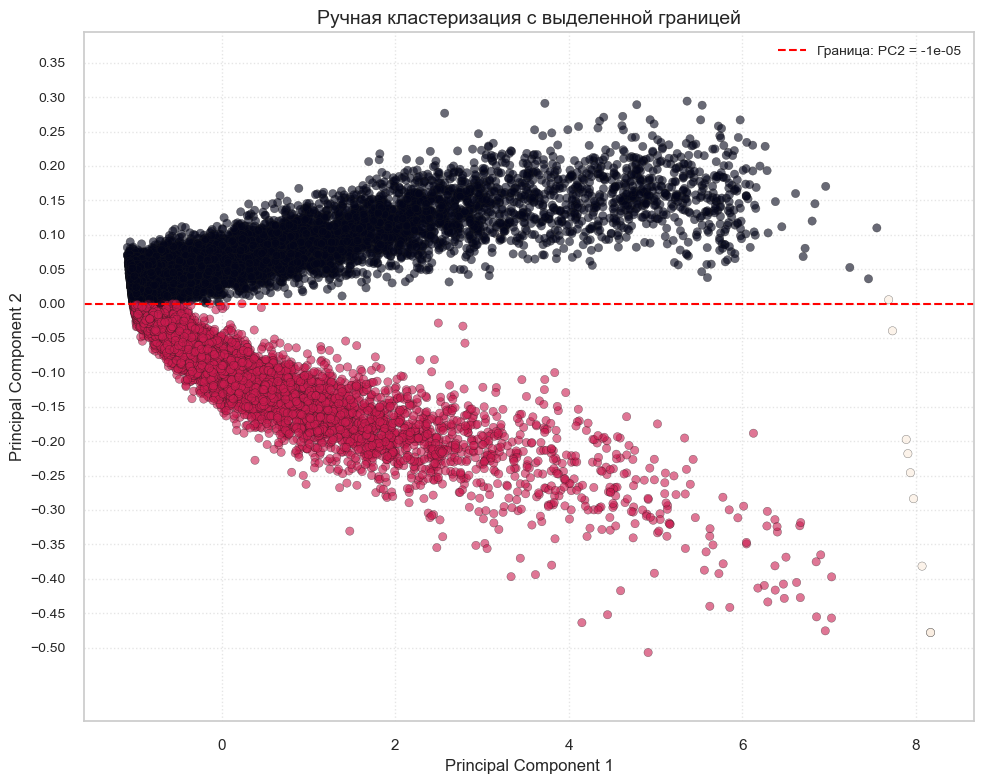

In [166]:
# Настройка размера и пропорций графика
plt.figure(figsize=(10, 8))  # Ширина x Высота (увеличена высота)

# Построение scatter-plot с кластерами
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, alpha=0.6, edgecolor='k', linewidth=0.3)

# Добавление горизонтальной линии для границы разделения
boundary = -0.00001  # Пример значения, замените на ваше
plt.axhline(y=boundary, color='red', linestyle='--', linewidth=1.5, label=f'Граница: PC2 = {boundary}')

# Увеличение отступов слева и детализация оси Y
plt.xlim(X_pca[:, 0].min() - 0.5, X_pca[:, 0].max() + 0.5)  # Отступы по X
plt.ylim(X_pca[:, 1].min() - 0.1, X_pca[:, 1].max() + 0.1)  # Растягиваем по Y

# Подписи и сетка
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('Ручная кластеризация с выделенной границей', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle=':', alpha=0.5)

# Детальные деления на оси Y для точного определения границы
plt.yticks(np.arange(round(X_pca[:, 1].min(), 1), round(X_pca[:, 1].max(), 1) + 0.1, 0.05), fontsize=10)

plt.tight_layout()  # Автоматическая корректировка отступов
plt.show()

In [123]:
clusters[0:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1])

In [168]:
inverted = np.where((clusters == 0) | (clusters == 1), 1 - clusters, clusters) #создаёт новый массив inverted, который инвертирует значения 0 и 1 в массиве clusters, сохраняя при этом все другие значения

# Преобразуем в DataFrame
df = pd.DataFrame({
    'index': np.arange(len(inverted)),  # Столбец индексов
    'cluster': inverted                 # Столбец значений
})

# Сохраняем в CSV
df.to_csv('submission-s24.csv', index=False)

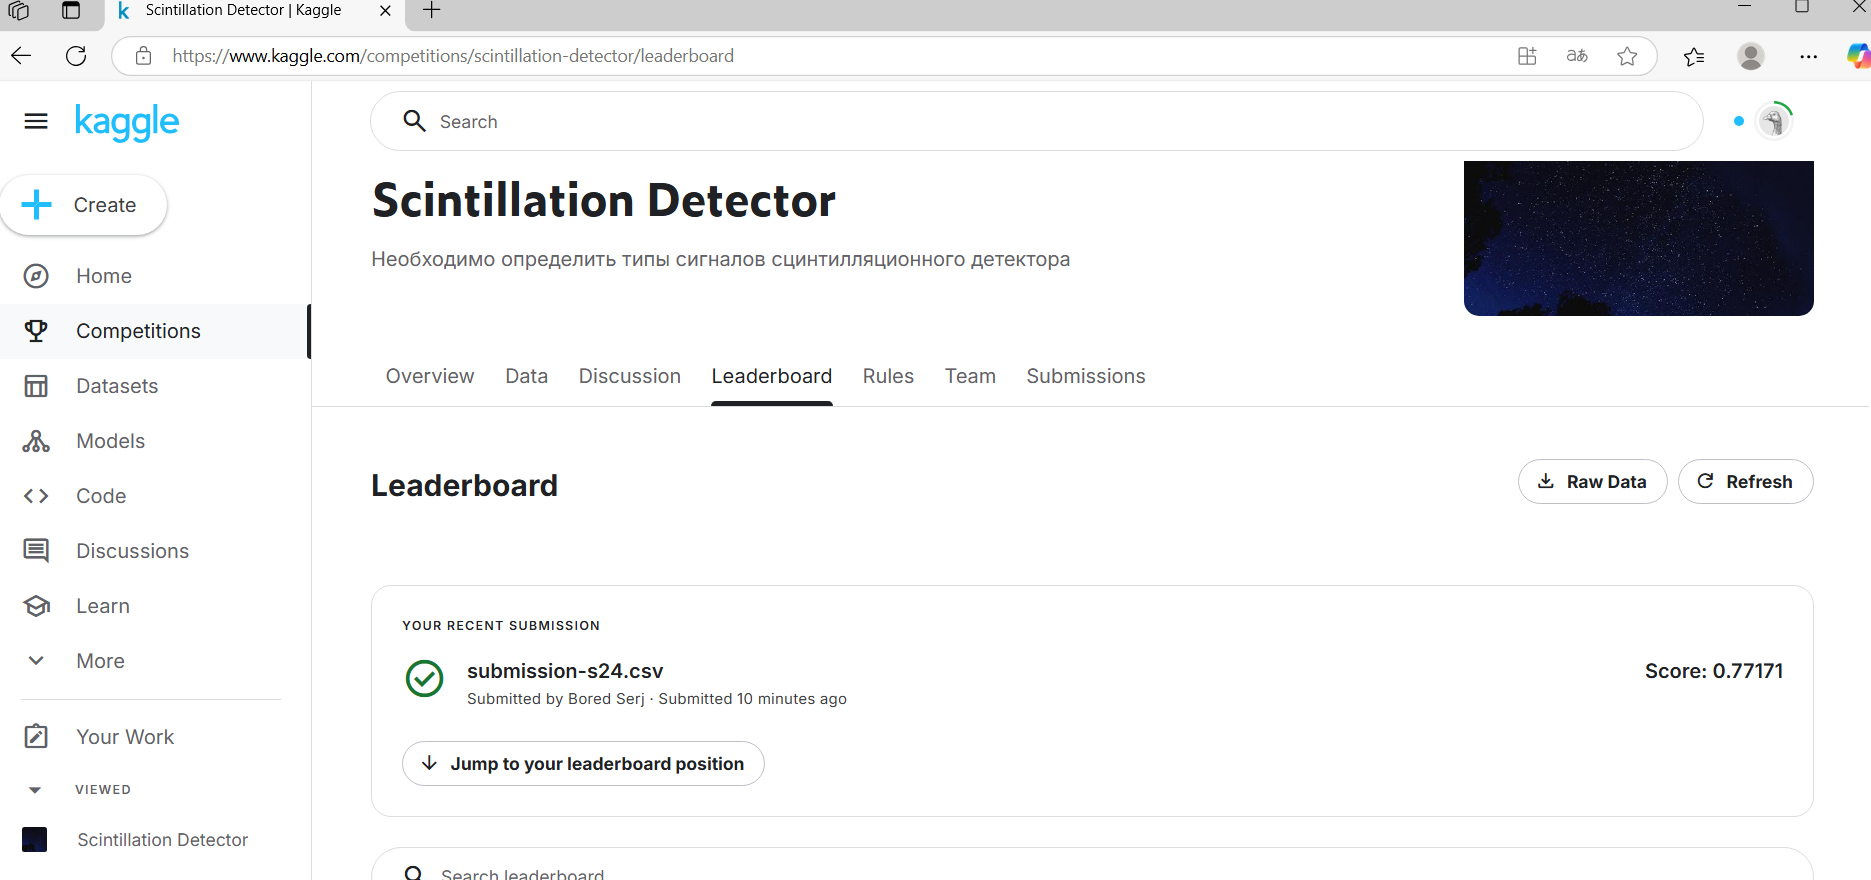

In [2]:
from IPython.display import Image, display

# Отображаем изображение из файла
display(Image(filename=r'C:\Users\NikLeo\skillfa\sesion.png'))